In [1]:
from bs4 import BeautifulSoup
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
url

C:\Users\Acer\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.worldometers.info/coronavirus/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


https://www.worldometers.info/coronavirus/

In [2]:
import requests
response = requests.get(url)
response

<Response [200]>

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 115,070,704 Cases and 2,552,120 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon
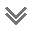

In [3]:
soup = response.text
soup = BeautifulSoup(soup, "lxml")
soup

In [6]:
table = soup.find('table', attrs={'id': 'main_table_countries_today'})


In [7]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="Nor

In [8]:
rows = table.find_all("tr", attrs={"style": ""})

In [10]:
print(rows)

[<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>, <tr class="total_row_world">
<td></td>
<td style="text-align:left;">World</td>
<td>115,070,704</td>
<td>+81,063</td>
<td>2,552,120</td>
<td>+2,226</td>
<td>90,792,803</td>
<td>+79,352</td>
<td>21,725,781</td>
<td>90,321</td>
<td>14,762</td>
<td>3

In [11]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:13])
        
    else:
        data.append(item.text.strip().split("\n")[:12])

In [27]:
data[1::-1]

[['World',
  '115,070,704',
  '+81,063',
  '2,552,120',
  '+2,226',
  '90,792,803',
  '+79,352',
  '21,725,781',
  '90,321',
  '14,762',
  '327.4',
  ''],
 ['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests']]

In [19]:
# import csv
# with open('coronavirus.csv', 'x') as f:
#     x = csv.writer(f)
#     for i in data:
#         x.writerow(i)


FileExistsError: [Errno 17] File exists: 'coronavirus.csv'

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import dask.dataframe as dd

dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting the header
df = dd.from_pandas(dt,npartitions=1)

In [29]:
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,World,"115,070,704","+81,063","2,552,120","+2,226","90,792,803","+79,352","21,725,781","90,321","14,762",327.4,
1,1,USA,"29,314,254",,"527,226",,"19,817,532",,"8,969,496","14,545","88,218","1,587"
2,2,India,"11,124,527",+908,"157,275",,"10,798,921","+2,363","168,331","8,944","8,009",113
3,3,Brazil,"10,589,608",,"255,836",,"9,457,100",,"876,672","8,318","49,585","1,198"
4,4,Russia,"4,268,215","+10,565","86,896",+441,"3,838,040","+14,966","343,279","2,300","29,239",595


In [31]:
df.to_csv('../pithn/coronaviirus-*.csv')


['C:/Users/Acer/pithn/coronaviirus-0.csv']